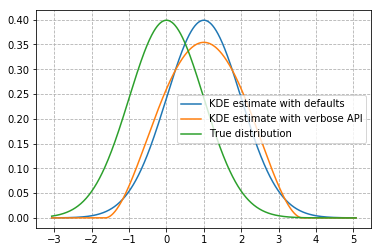

In [1]:
from KDEpy import FFTKDE, NaiveKDE
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
from evaluation import name_to_rgb
from colour_dict import colour_dict
import copy
import random
%matplotlib inline

# Generate a distribution and draw 2**6 data points
dist = norm(loc=0, scale=1)
data = dist.rvs(2**6)
data = np.array([1])

# Compute kernel density estimate on a grid using Silverman's rule for bw
x, y1 = NaiveKDE().fit(data)(2**10)

# Compute a weighted estimate on the same grid, using verbose API
weights = np.arange(len(data)) + 1
estimator = NaiveKDE(kernel='biweight', bw='silverman')
y2 = estimator.fit(data, weights=weights).evaluate(x)

plt.plot(x, y1, label='KDE estimate with defaults')
plt.plot(x, y2, label='KDE estimate with verbose API')
plt.plot(x, dist.pdf(x), label='True distribution')
plt.grid(True, ls='--', zorder=-15); plt.legend()

In [6]:
NaiveKDE().fit([0])()

(array([-4.07315999, -4.06519683, -4.05723366, ...,  4.05723366,
         4.06519683,  4.07315999]),
 array([9.96093325e-05, 1.02889892e-04, 1.06271755e-04, ...,
        1.06271755e-04, 1.02889892e-04, 9.96093325e-05]))

In [7]:
n=1
colours = np.array(list((map(name_to_rgb, colour_dict['red']))))
d = list(zip(np.repeat(colours[:,0], n), np.repeat(colours[:,1], n), np.repeat(colours[:,2], n)))
a = copy.copy(d)
random.shuffle(a)
a = np.array(a)

In [8]:
for i in range(0, 50):
    print(i, max(1 if not i else i**(-1), 0.15))
    

0 1
1 1.0
2 0.5
3 0.3333333333333333
4 0.25
5 0.2
6 0.16666666666666666
7 0.15
8 0.15
9 0.15
10 0.15
11 0.15
12 0.15
13 0.15
14 0.15
15 0.15
16 0.15
17 0.15
18 0.15
19 0.15
20 0.15
21 0.15
22 0.15
23 0.15
24 0.15
25 0.15
26 0.15
27 0.15
28 0.15
29 0.15
30 0.15
31 0.15
32 0.15
33 0.15
34 0.15
35 0.15
36 0.15
37 0.15
38 0.15
39 0.15
40 0.15
41 0.15
42 0.15
43 0.15
44 0.15
45 0.15
46 0.15
47 0.15
48 0.15
49 0.15


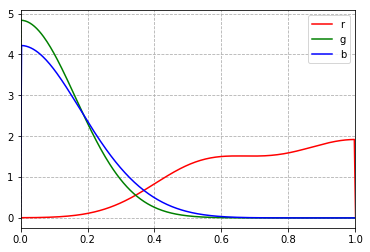

In [14]:
i = len(a)
kernel = 'gaussian'#'gaussian'#'tricube'#
bw = 0.15#'silverman'
data1 = np.concatenate([a[:i, 0], -a[:i, 0], 2 - a[:i, 0]])
x, r1 = NaiveKDE(kernel=kernel, bw=bw).fit(data1)(2**10)
r1[x<0] = 0  # Set the KDE to zero outside of the domain
r1[x>1] = 0
r1 = r1 * 3
plt.plot(x, r1, label='r', color='red')

data2 = np.concatenate([a[:i, 1], -a[:i, 1], 2 - a[:i, 1]])
x, r2 = NaiveKDE(kernel=kernel, bw=bw).fit(data2)(2**10)
r2[x<0] = 0  # Set the KDE to zero outside of the domain
r2[x>1] = 0
r2 = r2 * 3
plt.plot(x, r2, label='g', color='green')

data3 = np.concatenate([a[:i, 2], -a[:i, 2], 2 - a[:i, 2]])
x, r3 = NaiveKDE(kernel=kernel, bw=bw).fit(data3)(2**10)
r3[x<0] = 0  # Set the KDE to zero outside of the domain
r3[x>1] = 0
r3 = r3 * 3

plt.plot(x, r3, label='b', color='blue')
#plt.plot(x, dist.pdf(x), label='True distribution')
plt.xlim(0,1)
plt.grid(True, ls='--', zorder=-15); plt.legend()

In [3]:
from prob_model import KDEColourModel
import numpy as np
%matplotlib inline
import pickle

0.5
bw 1.0
bw 0.5
bw 0.3333333333333333
bw 0.25
bw 0.2
0.9755498453423824
3.7096660250058383e-06


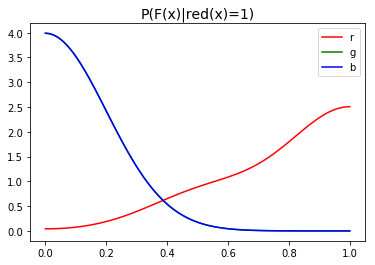

In [4]:
cm = KDEColourModel('red')
print(cm.p(1, [1,0,0]))
cm.update(np.array([1,0,0]), 1)
cm.update(np.array([0.54, 0, 0]), 1)
cm.update(np.array([1,0,0]), 1)
cm.update(np.array([1,0,0]), 1)
cm.update(np.array([0.54, 0, 0]), 1)
print(cm.p(1, [1,0,0]))
print(cm.p(1, [0,0,1]))
cm.draw()

In [16]:
a,b,c  = (1, 3)

ValueError: not enough values to unpack (expected 3, got 2)

In [6]:
with open('tmp.pickle', 'wb') as f:
    pickle.dump(cm, f)

PicklingError: Can't pickle <function gaussian at 0x7fc606af5840>: it's not the same object as KDEpy.kernel_funcs.gaussian

In [14]:
pickle.PicklingError

_pickle.PicklingError

In [12]:
r = cm.model[0]
r.data

array([[ 1.  ],
       [ 0.54],
       [ 1.  ],
       [ 1.  ],
       [ 0.54],
       [-1.  ],
       [-0.54],
       [-1.  ],
       [-1.  ],
       [-0.54],
       [ 1.  ],
       [ 1.46],
       [ 1.  ],
       [ 1.  ],
       [ 1.46]])

In [15]:
data = cm.data
train_data = np.concatenate([data, -data, 2-data])
train_data[:,2]

array([0, 0, 2])

In [9]:
import numpy as np
a1 = np.array([])
a2 = np.array([[1,2,3]])
np.concatenate((None, a2))

ValueError: zero-dimensional arrays cannot be concatenated

In [ ]:
a2

In [21]:
ar = np.array([0, 0])

In [22]:
gkde = gaussian_kde(ar, bw_method=0.15)

LinAlgError: Singular matrix

In [8]:
gkde.evaluate([[0,1,0]])

ValueError: points have dimension 1, dataset has dimension 2

(81, 2)


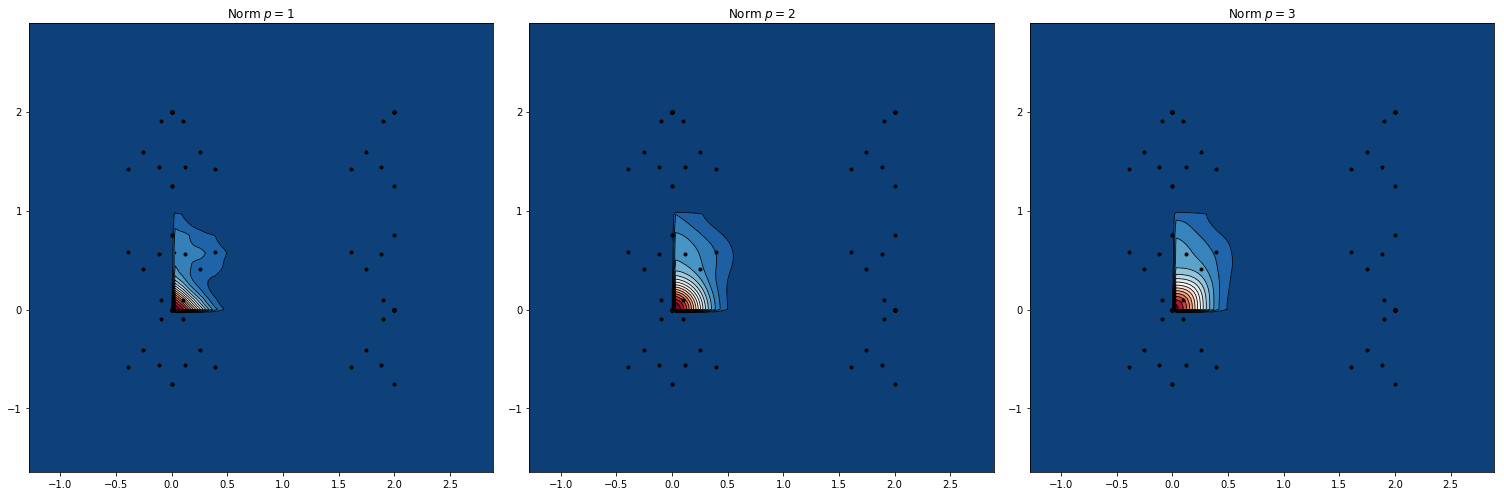

In [63]:
from KDEpy import FFTKDE
import copy
# Create 2D data of shape (obs, dims)
flip1 = copy.copy(datas)
flip1[:,0] = 2-flip1[:,0]
flip2 = copy.copy(datas)
flip2[:,1] = 2-flip2[:,1]
flip3 = copy.copy(datas)
flip3[:,0] = -flip3[:,0]
flip4 = copy.copy(datas)
flip4[:,1] = -flip3[:,1]
flip5 = copy.copy(datas)
flip5 = 2-flip5
flip6 = copy.copy(datas)
flip6 = np.array([0,2])-flip6
flip7 = copy.copy(datas)
flip7 = np.array([2,0])-flip7
flip8 = copy.copy(datas)
flip8 = np.array([0,0])-flip8
data = np.concatenate([datas, flip1, flip2, flip3, flip4, flip5, flip6, flip7, flip8], axis=0)
print(data.shape)
grid_points = 2**7  # Grid points in each dimension
N = 16  # Number of contours
fig = plt.figure(figsize=(21, 7))
for plt_num, norm in enumerate([1, 2, 3], 1):

    ax = fig.add_subplot(1, 3, plt_num)
    ax.set_title(f'Norm $p={norm}$')

    # Compute the kernel density estimate
    kde = FFTKDE(kernel='gaussian', norm=norm, bw=0.2)
    grid, points = kde.fit(data).evaluate(grid_points)

    points[grid[:,0]>1] = 0
    points[grid[:,1]>1] = 0
    points[grid[:,0]<0] = 0
    points[grid[:,1]<0] = 0
    
    points = points*9
    # The grid is of shape (obs, dims), points are of shape (obs, 1)
    x, y = np.unique(grid[:, 0]), np.unique(grid[:, 1])

    z = points.reshape(grid_points, grid_points).T

    # Plot the kernel density estimate
    ax.contour(x, y, z, N, linewidths=0.8, colors='k')
    ax.contourf(x, y, z, N, cmap="RdBu_r")
    ax.plot(data[:, 0], data[:, 1], 'ok', ms=3)

plt.tight_layout()

In [39]:
(grid[:,0]>0).shape

(16384,)

In [2]:
n=1
colours = np.array(list((map(name_to_rgb, colour_dict['red']))))
d = list(zip(np.repeat(colours[:,0], n), np.repeat(colours[:,1], n), np.repeat(colours[:,2], n)))
a = copy.copy(d)
random.shuffle(a)
a = np.array(a)

In [58]:
datas = a[:,0:2]
datas

array([[0.25490198, 0.4117647 ],
       [0.        , 0.        ],
       [0.        , 0.7490196 ],
       [0.09803922, 0.09803922],
       [0.39215687, 0.58431375],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.11764706, 0.5647059 ],
       [0.        , 0.        ]], dtype=float32)

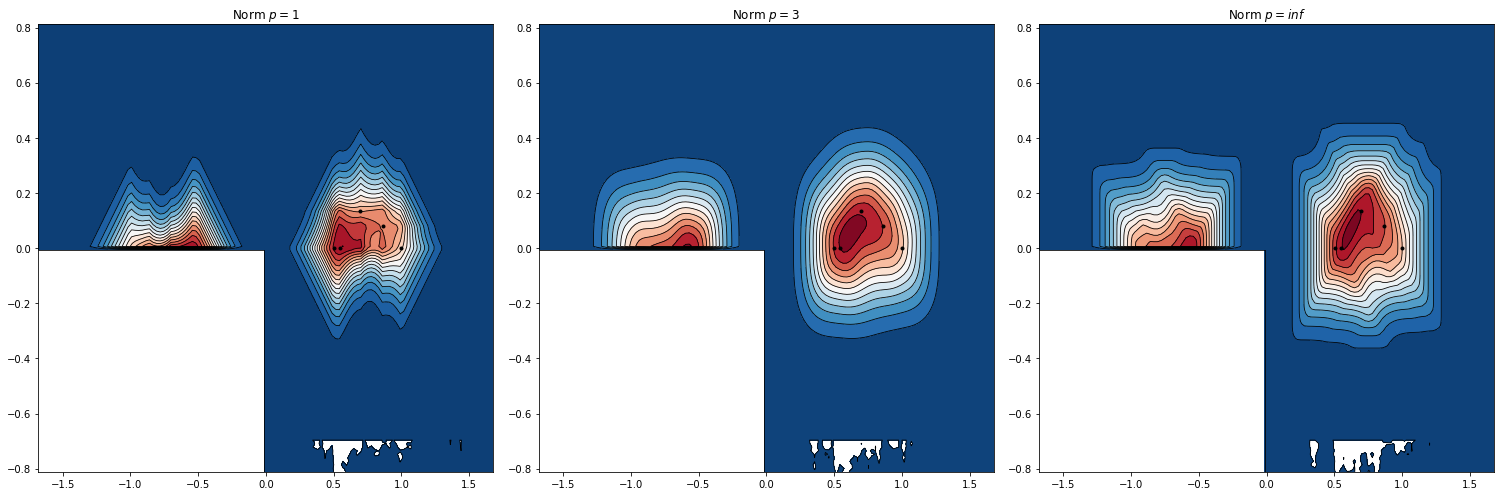

In [72]:
from KDEpy import FFTKDE

# Create 2D data of shape (obs, dims)
#data = np.random.randn(2**2, 2)

grid_points = 2**7  # Grid points in each dimension
N = 16  # Number of contours
fig = plt.figure(figsize=(21, 7))
for plt_num, norm in enumerate([1, 3, np.inf], 1):

    in_data = np.concatenate([data, np.array([0,0]) - data])
    
    ax = fig.add_subplot(1, 3, plt_num)
    ax.set_title(f'Norm $p={norm}$')

    # Compute the kernel density estimate
    kde = FFTKDE(kernel='gaussian', bw=0.15,  norm=norm)
    grid, points = kde.fit(in_data).evaluate(grid_points)

    points[np.all(grid < np.array([0,0]), axis=1)] = 0
    
    # The grid is of shape (obs, dims), points are of shape (obs, 1)
    x, y = np.unique(grid[:, 0]), np.unique(grid[:, 1])
    z = points.reshape(grid_points, grid_points).T

    # Plot the kernel density estimate
    ax.contour(x, y, z, N, linewidths=0.8, colors='k')
    ax.contourf(x, y, z, N, cmap="RdBu_r")
    ax.plot(data[:, 0], data[:, 1], 'ok', ms=3)

plt.tight_layout()

In [67]:
points

array([2.80688325e-16, 2.77736537e-16, 2.76450702e-16, ...,
       3.10933471e-16, 3.11695052e-16, 3.12764207e-16])

In [71]:
points[np.all(grid<np.array([0,0]), axis=1)]

array([2.80688325e-16, 2.77736537e-16, 2.76450702e-16, ...,
       5.82938818e-03, 7.87778415e-03, 1.05715477e-02])

In [3]:
from prob_model import KDEColourModel

In [4]:
cm = KDEColourModel('red', use_3d=True, fix_bw=True, bw=0.2)

In [5]:
from evaluation import test_colour_model, colour_probs, colour_dict, name_to_rgb


In [52]:
cm.data

In [6]:
cm.update(a[2], 1)

In [8]:
cm.p(1, [a[4]])

array([0.75886543])

In [39]:
len(np.array(a[4]).shape)

1

In [7]:
test_colour_model(cm)

True Label  R=1 R=0
Predict R=1| 5 | 0 |
        R=0| 0 | 37 |


{'fn': 0, 'fp': 0, 'tn': 37, 'tp': 5}